## Descriptions:

- The Chicago Crime Data has been cleaned up in another Jupyter book "ChicagoCrimeData - Data Wrangling.ipynb". In this Jupyter book, its cleaned version will be uploaded directly.
- The Chicago census data by Community Area is also loaded and then joined with the Chicago Crime Data for data analysis and model building
- In this book, I will firstly use statistics to analyze the impact of each demographic factor from the Chicago census data on the Crime Rate in Chicago. 
- Then use various Linear Regression techniques to develope a model between the Crime Rate and import demographic factors available. This model can be used to predict the crime rate. 
- At the end, use one of unsupervised training methods to generate clusters, and identify one or two clusters that have highest Crime Rate. 

In [1]:
# upload the Chicago Crime Data that has been cleaned up
import pandas as pd
pd.set_option('display.max_columns', 25)
df = pd.read_csv('C:\Various Files\DataScience\ChicagoCrime\Crimes_2001_to_2018_clean.csv' )


df['Date'] = pd.to_datetime(df['Date'])
df['Updated_On'] = pd.to_datetime(df['Updated_On'])

In [2]:
# upload the Chicago census data gathered between 2011-2015
ref = pd.read_csv('C:\Various Files\DataScience\ChicagoCrime\ReferenceCCA20112015.csv')


census = ref[['GEOG', 'TOT_POP', 'MED_AGE','UND19', 'A20_34', 'A35_49', 'A50_64', 'A65_79','OV80', 
                   'IN_LBFRC', 'EMP', 'UNEMP', 'NOT_IN_LBFRC',
                  'HS', 'BACH',
                  'MEDINC', 'INC_LT_25K', 'INC_25_50K', 'INC_50_75K', 'INC_75_100K', 'INC_100_150K', 'INC_GT_150',
                  'OWN_OCC_HU', 'RENT_OCC_HU', 'HU_TOT',
                   'BR_0_1', 'BR_2', 'BR_3', 'BR_4', 'BR_5']]

In [3]:
# upload the mapping data between Community Areas and Community IDs
community_areas_numbers = pd.read_csv('C:\Various Files\DataScience\ChicagoCrime\Community_Areas_Names_w_Numbers.csv')
community_areas_numbers.columns = ['Community_Area', 'GEOG']

# Table join to ensure that both Community Area names and Community Area IDs are presented
census = pd.merge(census, community_areas_numbers, on='GEOG', how = 'inner')
census.shape

(77, 31)

In [4]:
census.head(5)

,GEOG,TOT_POP,MED_AGE,UND19,A20_34,A35_49,A50_64,A65_79,OV80,IN_LBFRC,EMP,UNEMP,...,INC_75_100K,INC_100_150K,INC_GT_150,OWN_OCC_HU,RENT_OCC_HU,HU_TOT,BR_0_1,BR_2,BR_3,BR_4,BR_5,Community_Area
0,Albany Park,52079,33.770750,13550,13719,11806,8412,3257,1335,29624,26868,2703,...,1912,1936,1579,6405,10068,18191,4459,7331,4826,1234,341,14
1,Archer Heights,13266,31.991324,4205,2948,2830,1924,947,411,6594,5808,786,...,317,425,114,2140,1700,4247,357,1455,1806,402,227,57
2,Armour Square,14068,41.954645,3029,3004,2500,2806,1815,915,6997,5919,1078,...,263,383,121,1858,3362,5717,1358,1877,2040,285,158,34
3,Ashburn,42752,36.164390,12506,8188,8951,8557,3401,1149,21985,19004,2981,...,2083,2307,923,10850,1973,13481,397,2221,7452,2548,863,70
4,Auburn Gresham,45842,39.134577,12050,8948,7776,9624,5420,2024,20187,14910,5234,...,1103,972,306,7498,9652,20435,3672,7045,6608,2139,971,71


In [5]:
# The Unemployee Rate is calcuated with the number of unemployment 
#over the number of both unemployment and employment in a Community Area
census['UNEMP_RATE'] = census['UNEMP']/(census['EMP'] + census['UNEMP'])
#census['HS_RATE'] = census['HS']/(census['TOT_POP'] )
#census['BACH_RATE'] = census['BACH']/census['TOT_POP']
#census['OWN_OCC_HU_RATE'] = census['OWN_OCC_HU']/census['HU_TOT']

# The High School Diploma or Higher Rate is calculated over the population
# of 19 or older in a Community Area
census['HS_RATE'] = census['HS']/(census['TOT_POP'] - census['UND19'])
# The Bachelor Degree or Higher Rate is calculated over the population
# of 19 or older in a Community Area
census['BACH_RATE'] = census['BACH']/(census['TOT_POP'] - census['UND19'])
# The House/Apartment Owning Rate is calculated with the number of owning units over the number of total units
census['OWN_OCC_HU_RATE'] = census['OWN_OCC_HU']/census['HU_TOT']

In [6]:
# the census data gathered between 2011-2015, for the analysis, just focus on the Crime data in 2015

df_sub = df[df['Date'].dt.year == 2015]['ID'].groupby(df['Community_Area']).count()
df_sub = df_sub.reset_index()
df_sub.rename(columns={'ID':'Crime_Number'}, inplace = True)
df_sub.head()

,Community_Area,Crime_Number
0,1,3508
1,2,3051
2,3,3562
3,4,1739
4,5,1369


In [7]:
# join the group-by data for Crime Rate with the census data for Chicago Community Areas
merged_df = pd.merge(census, df_sub, on='Community_Area', how='inner')
merged_df.head()

,GEOG,TOT_POP,MED_AGE,UND19,A20_34,A35_49,A50_64,A65_79,OV80,IN_LBFRC,EMP,UNEMP,...,HU_TOT,BR_0_1,BR_2,BR_3,BR_4,BR_5,Community_Area,UNEMP_RATE,HS_RATE,BACH_RATE,OWN_OCC_HU_RATE,Crime_Number
0,Albany Park,52079,33.770750,13550,13719,11806,8412,3257,1335,29624,26868,2703,...,18191,4459,7331,4826,1234,341,14,0.091407,0.680319,0.272055,0.352097,2499
1,Archer Heights,13266,31.991324,4205,2948,2830,1924,947,411,6594,5808,786,...,4247,357,1455,1806,402,227,57,0.119199,0.596733,0.098002,0.503885,981
2,Armour Square,14068,41.954645,3029,3004,2500,2806,1815,915,6997,5919,1078,...,5717,1358,1877,2040,285,158,34,0.154066,0.601141,0.194764,0.324996,1060
3,Ashburn,42752,36.164390,12506,8188,8951,8557,3401,1149,21985,19004,2981,...,13481,397,2221,7452,2548,863,70,0.135592,0.734014,0.177180,0.804836,2274
4,Auburn Gresham,45842,39.134577,12050,8948,7776,9624,5420,2024,20187,14910,5234,...,20435,3672,7045,6608,2139,971,71,0.259829,0.748816,0.126450,0.366920,7726


In [8]:
import numpy as np
#merged_df['Crime_Rate'] = merged_df['Crime_Number']/merged_df['TOT_POP']
merged_df['Crime_Rate'] = merged_df['Crime_Number']/(merged_df['TOT_POP'] - census['UND19'])
# With Log, the correlation between it and a feature may be better
merged_df['Crime_Rate_Log'] = np.log(merged_df['Crime_Rate']) - np.min(np.log(merged_df['Crime_Rate'])) 

### Analyses for Individual Feature

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# define a function for calculating the pearson correlation coefficient between two features
def pearson_r(data1, data2):
    corr_coff = np.corrcoef(data1, data2)
    return corr_coff[0, 1]

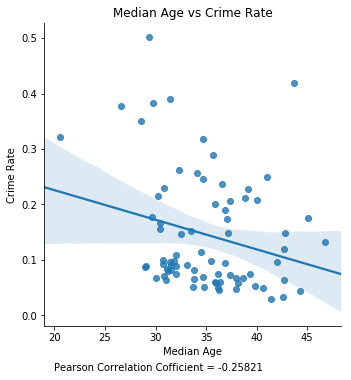

<Figure size 216x288 with 0 Axes>

In [10]:
# Calcuate the pearson correlation coefficient and embed it in the chart
pearson_coff = pearson_r(merged_df['MED_AGE'], merged_df['Crime_Rate_Log'])
coff_str = "Pearson Correlation Cofficient = " + str('%.5f' % pearson_coff)

# for the relationship between the Median Age and Crime Rate for Community Areas
sns.lmplot(x='MED_AGE', y='Crime_Rate', data= merged_df)
plt.title( 'Median Age vs Crime Rate')
plt.xlabel( 'Median Age')
plt.ylabel( 'Crime Rate')
plt.text(20.0, -0.1, coff_str, fontsize=10, horizontalalignment='left')
plt.figure(figsize=(3,4))
plt.show()

#### Observations:
Except the outliers, it seems that Crime Rate weakly deceases with the increase with the Median Age for a Community Area. 

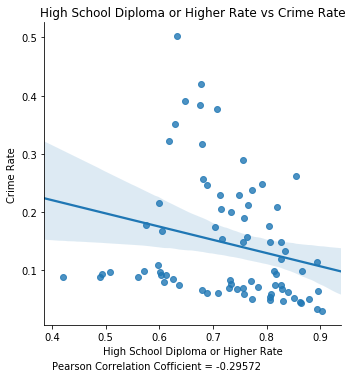

<Figure size 216x288 with 0 Axes>

In [11]:
# Calcuate the pearson correlation coefficient and embed it in the chart
pearson_coff = pearson_r(merged_df['HS_RATE'], merged_df['Crime_Rate_Log'])
coff_str = "Pearson Correlation Cofficient = " + str('%.5f' % pearson_coff)

# for the relationship between the High School Diploma or Higher and Crime Rate for Community Areas
sns.lmplot(x='HS_RATE', y='Crime_Rate', data= merged_df)
plt.title( 'High School Diploma or Higher Rate vs Crime Rate')
plt.xlabel( 'High School Diploma or Higher Rate')
plt.ylabel( 'Crime Rate')
plt.text(0.4, -0.07, coff_str, fontsize=10, horizontalalignment='left')
plt.figure(figsize=(3,4))
plt.show()

#### Observations:
It seems that Crime Rate has negative correlation with the High School Diploma or Higher Rate for a Community Area. 

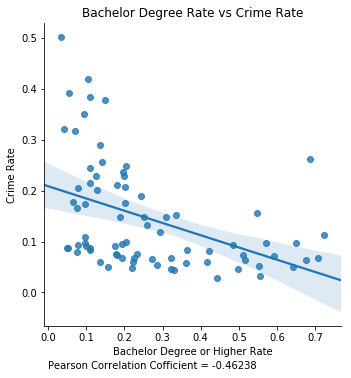

<Figure size 216x288 with 0 Axes>

In [12]:
# Calcuate the pearson correlation coefficient and embed it in the chart
pearson_coff = pearson_r(merged_df['BACH_RATE'], merged_df['Crime_Rate_Log'])
coff_str = "Pearson Correlation Cofficient = " + str('%.5f' % pearson_coff)

# for the relationship between the Bachelor Degree or Higher and Crime Rate for Community Areas
sns.lmplot(x='BACH_RATE', y='Crime_Rate', data= merged_df)
plt.title( 'Bachelor Degree Rate vs Crime Rate')
plt.xlabel( 'Bachelor Degree or Higher Rate')
plt.ylabel( 'Crime Rate')
plt.text(0.0, -0.15, coff_str, fontsize=10, horizontalalignment='left')
plt.figure(figsize=(3,4))
plt.show()

#### Observations:
It seems that Crime Rate deceases with the increase with the Bachelor's Degree or Higher Rate for a Community Area. The negative relatinship here is much stronger than the negative relatioinship between High School Diploma or Higher Rate and Crime Rate.

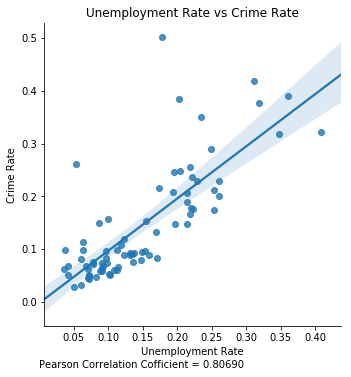

<Figure size 216x216 with 0 Axes>

In [13]:
# Calcuate the pearson correlation coefficient and embed it in the chart
pearson_coff = pearson_r(merged_df['UNEMP_RATE'], merged_df['Crime_Rate_Log'])
coff_str = "Pearson Correlation Cofficient = " + str('%.5f' % pearson_coff)

# for the relationship between the Unemployee Rate vs Crime Rate for Community Areas
sns.lmplot(x='UNEMP_RATE', y='Crime_Rate', data= merged_df)
plt.title( 'Unemployment Rate vs Crime Rate')
plt.xlabel( 'Unemployment Rate')
plt.ylabel( 'Crime Rate')
plt.text(0.0, -0.125, coff_str, fontsize=10, horizontalalignment='left')
plt.figure(figsize=(3,3))
plt.show()

#### Observations:
The Crime Rate and Unemployment Rate have very strong positive relationship.

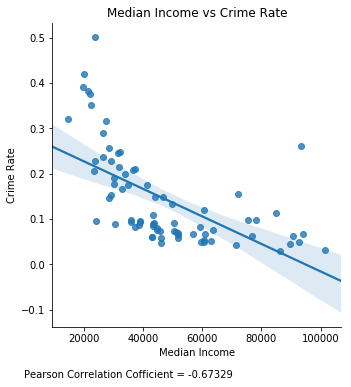

<Figure size 216x216 with 0 Axes>

In [14]:
# Calcuate the pearson correlation coefficient and embed it in the chart
pearson_coff = pearson_r(merged_df['MEDINC'], merged_df['Crime_Rate_Log'])
coff_str = "Pearson Correlation Cofficient = " + str('%.5f' % pearson_coff)

# for the relationship between the Median Income vs Crime Rate for Community Areas
sns.lmplot(x='MEDINC', y='Crime_Rate', data= merged_df)
plt.title( 'Median Income vs Crime Rate')
plt.xlabel( 'Median Income')
plt.ylabel( 'Crime Rate')
plt.text(0.0, -0.25, coff_str, fontsize=10, horizontalalignment='left')
plt.figure(figsize=(3,3))
plt.show()

#### Observations:
The Crime Rate and Median Income have strong negative relationship.

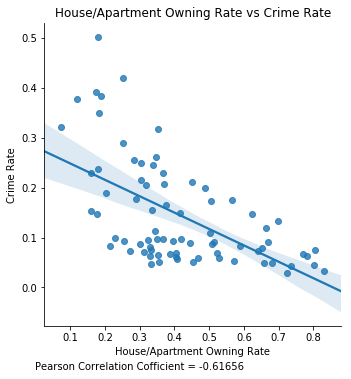

<Figure size 216x216 with 0 Axes>

In [80]:
# Calcuate the pearson correlation coefficient and embed it in the chart
pearson_coff = pearson_r(merged_df['OWN_OCC_HU_RATE'], merged_df['Crime_Rate_Log'])
coff_str = "Pearson Correlation Cofficient = " + str('%.5f' % pearson_coff)

# for the relationship between the House/Apartment Owning Rate vs Crime Rate for Community Areas
sns.lmplot(x='OWN_OCC_HU_RATE', y='Crime_Rate', data= merged_df)
plt.title( 'House/Apartment Owning Rate vs Crime Rate')
plt.xlabel( 'House/Apartment Owning Rate')
plt.ylabel( 'Crime Rate')
plt.text(0.0, -0.165, coff_str, fontsize=10, horizontalalignment='left')
plt.figure(figsize=(3,3))
plt.show()

#### Observations:
- The Crime Rate and House/Apartment Owning Rate have strong negative relationship.

- From the above, the Unemployment Rate has the strongest relationship with the Crime Rate, and the Median Age has the weakest relationship with the Crime Rate.

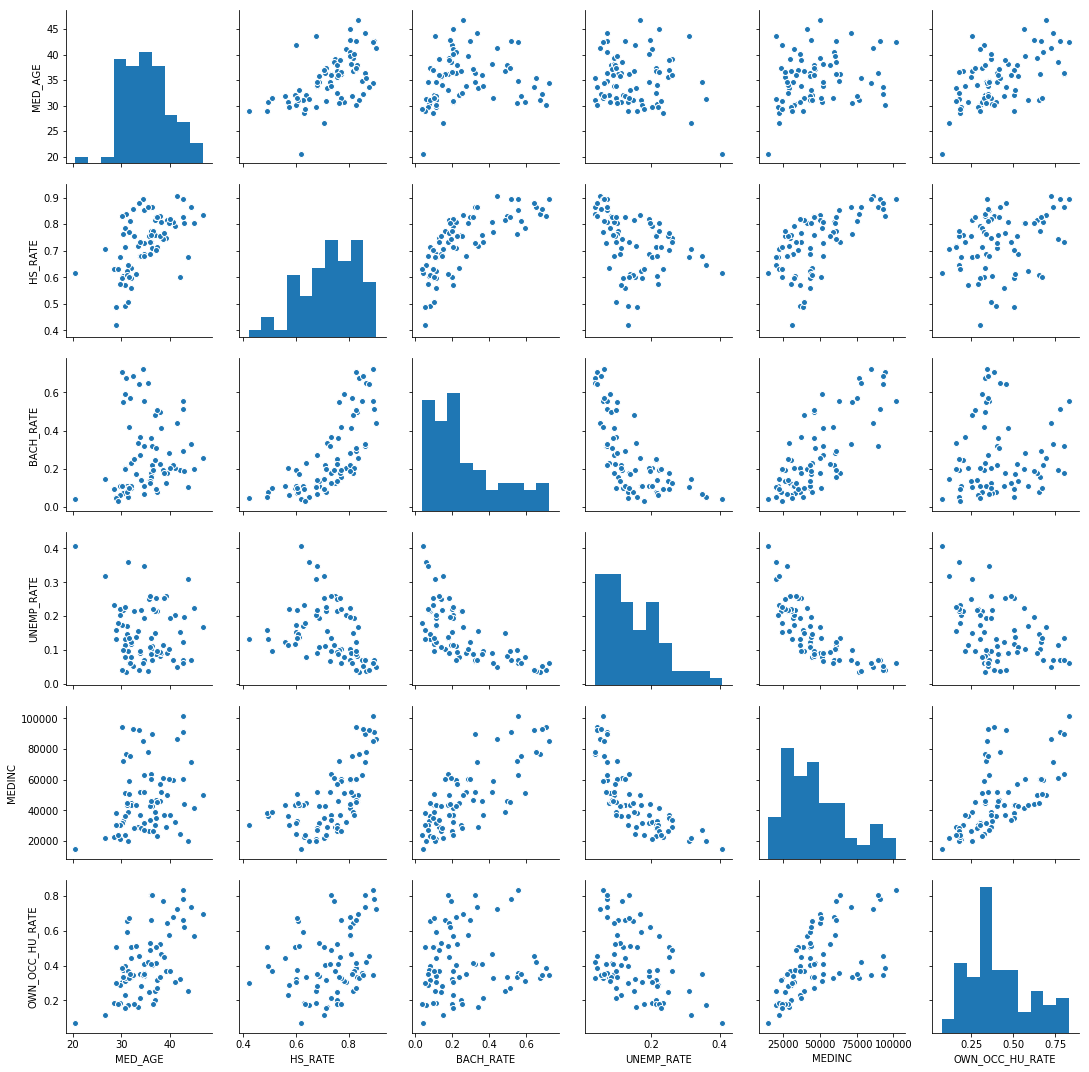

In [16]:
# Quickly check the relationships among all of the features
features = merged_df[['MED_AGE', 'HS_RATE', 'BACH_RATE', 'UNEMP_RATE', 'MEDINC', 'OWN_OCC_HU_RATE' ]];
sns.pairplot(features)

In [34]:
print ( "The Pearson correlation cofficient between High School Rate and Bachelor Degree Rate = {:5f}".format(
       pearson_r(features['BACH_RATE'], features['HS_RATE'])))
print ( "The Pearson correlation cofficient between Median Income and Bachelor Degree Rate = {:5f}".format( 
       pearson_r(features['MEDINC'], features['BACH_RATE'])))
print ( "The Pearson correlation cofficient between House/Apartment Owning Rate and Bachelor Degree Rate = {:5f}".format( 
       pearson_r(features['OWN_OCC_HU_RATE'], features['BACH_RATE'])))
print ( "The Pearson correlation cofficient between House/Apartment Owning Rate and Unemployment Rate = {:5f}".format( 
       pearson_r(features['OWN_OCC_HU_RATE'], features['UNEMP_RATE'])))
print ( "The Pearson correlation cofficient between Unemployement Rate and Bachelor Degree Rate = {:5f}".format( 
       pearson_r(features['UNEMP_RATE'], features['BACH_RATE'])))

The Pearson correlation cofficient between High School Rate and Bachelor Degree Rate = 0.729236
The Pearson correlation cofficient between Median Income and Bachelor Degree Rate = 0.773320
The Pearson correlation cofficient between House/Apartment Owning Rate and Bachelor Degree Rate = 0.076932
The Pearson correlation cofficient between House/Apartment Owning Rate and Unemployment Rate = -0.427709
The Pearson correlation cofficient between Unemployement Rate and Bachelor Degree Rate = -0.669248


#### Observations:

- Some features seem strongly correlated. For example, the High School Diploma or Higher Rate and the Bachelor Degree or Higher Rate have a strong positive correlation. The Median Inome and Bachelor Degree or above Rate have also a strong positive correlation. The Unemployment Rate and the Bachelor Degree or above Rate are negatively correlated.

### Linear Regressions

In [35]:
# Put all of the above features together for linear regressions
X = merged_df[['HS_RATE', 'BACH_RATE', 'UNEMP_RATE', 'OWN_OCC_HU_RATE' ]];

# Make the Median Ages and Median Incomes less than 1 to be consistent with others
X['MED_AGE_N'] = merged_df['MED_AGE']/100.0 
X['MEDINC_N'] = merged_df['MEDINC']/200000.0
Y = merged_df[['Crime_Rate', 'Crime_Rate_Log']]

C:\Users\fland\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\fland\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
X.head(5)

,HS_RATE,BACH_RATE,UNEMP_RATE,OWN_OCC_HU_RATE,MED_AGE_N,MEDINC_N
0,0.680319,0.272055,0.091407,0.352097,0.337707,0.259844
1,0.596733,0.098002,0.119199,0.503885,0.319913,0.216968
2,0.601141,0.194764,0.154066,0.324996,0.419546,0.121682
3,0.734014,0.177180,0.135592,0.804836,0.361644,0.317866
4,0.748816,0.126450,0.259829,0.366920,0.391346,0.146944


In [37]:
# Firstly use Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y.Crime_Rate)
print('Estimated intercept coefficient: {:f}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))

Estimated intercept coefficient: -0.116248
Number of coefficients: 6


In [72]:
# The coefficients for all features
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,HS_RATE,0.280622
1,BACH_RATE,-0.465539
2,UNEMP_RATE,0.778362
3,OWN_OCC_HU_RATE,-0.514992
4,MED_AGE_N,0.216100
5,MEDINC_N,0.854811


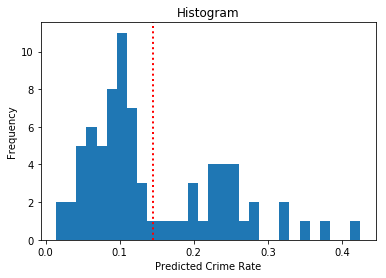

In [38]:
# predict with the orginal training data
predicted_crime_rate = lm.predict(X)

# produce a histogram for the predicted Crime Rate
plt.hist(predicted_crime_rate, bins=30)
plt.title("Histogram")
plt.xlabel("Predicted Crime Rate")
plt.ylabel("Frequency")

# draw the mean value of the predicted mean
plt.axvline(predicted_crime_rate.mean(), color='r', linestyle='dotted', linewidth=2)
plt.show()

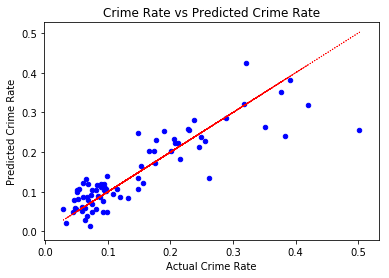

In [39]:
# Compare the orginal Crime Rate and the predicted Crime Rate
plt.scatter(Y.Crime_Rate, predicted_crime_rate, color='blue', s=20)
plt.title("Crime Rate vs Predicted Crime Rate")
plt.xlabel("Actual Crime Rate")
plt.ylabel("Predicted Crime Rate")

# draw a line for perfect match
plt.plot(Y.Crime_Rate, Y.Crime_Rate, color='r', linestyle='dotted', linewidth=1 )
plt.show()

In [40]:
# Evaluating the Model: the coefficient of determination (R2)
R2 = lm.score(X, Y.Crime_Rate)
print('R-squared:{:f}'.format(R2))

R-squared:0.759864


In [41]:
number_obs = Y.Crime_Rate.count()
F = (R2/(1-R2))*( number_obs - 6 - 1 )/5
print ('F-statistic: {:f}'.format(F))

F-statistic: 44.300176


In [42]:
#cross validation
from sklearn.model_selection import cross_val_score
# Perform 5-fold CV
cv_results = cross_val_score(lm, X, Y.Crime_Rate, cv=5 )
print(cv_results)
print('Average cross validation score = {:f}'.format(np.mean(cv_results)))

[0.58752454 0.824689   0.19062981 0.54555085 0.50916479]
Average cross validation score = 0.531512


#### Observations:
- After putting all features together, the High School Diploma or Higher Rate has positive correlation with the Crime Rate.
- After putting all features together, the Median Income has positive correclation with the Crime Rate. If considered independently, both have strong negative relationship.
- The histogram of the predicated crime rate is not a bell shaped curve. It is skewed largely to the right.
- Based on the scatter plot between the actual Crime Rates and the predicated Crime Rates , it seems that the model works well.
- R-squared is a statistical measure of how close the data is to the regression line. In this case, about 75.99% of the Crime Rate change can be explained by these six variables or features.
- F-statistic indicates that the model is overall statistically significant.
- Through the cross validation, the average score is 0.53. By checking the results, the score varies largely probably because of the small data volume.

In [43]:
X.describe()

,HS_RATE,BACH_RATE,UNEMP_RATE,OWN_OCC_HU_RATE,MED_AGE_N,MEDINC_N
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.729561,0.263865,0.149045,0.415369,0.350922,0.235841
std,0.108566,0.190725,0.082832,0.185821,0.048218,0.105358
min,0.419851,0.034767,0.036669,0.073791,0.205975,0.074228
25%,0.647942,0.109592,0.087322,0.300247,0.313922,0.153503
50%,0.748816,0.200800,0.131582,0.367214,0.347002,0.217105
75%,0.815355,0.360272,0.214679,0.521871,0.379344,0.298687
max,0.904365,0.722836,0.407990,0.831542,0.467294,0.507793


In [27]:
# from DataCamp - display the relationship between CV Score +/- Std Error and Alpha for Ridge Regression
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

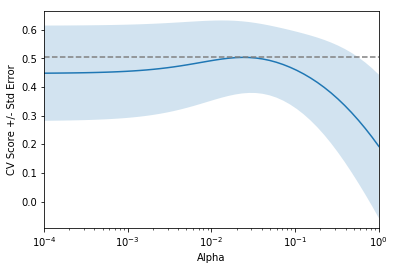

In [44]:
# Use the Ridge regression 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

ridge = Ridge(normalize=True)

y = Y.Crime_Rate
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10 )
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [45]:
from sklearn.model_selection import train_test_split

#Use alpha = 0.03 that seems the best from the above graph

ridge = Ridge(alpha = 0.03, normalize=True)

# split the data into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y.Crime_Rate, test_size = 0.25, random_state = 42)
ridge.fit(X_train, y_train)
# Display the estimated coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': ridge.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,HS_RATE,0.297241
1,BACH_RATE,-0.338422
2,UNEMP_RATE,0.828602
3,OWN_OCC_HU_RATE,-0.396490
4,MED_AGE_N,-0.035262
5,MEDINC_N,0.558467


In [46]:
# predict with the test set

predicted_crime_rate = ridge.predict(X_test)
print(ridge.score(X_test, y_test))

0.7840902944929365


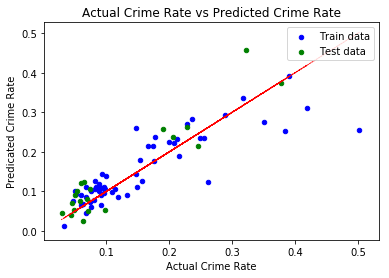

In [47]:
# Compare the orginal Crime Rate and the predicted Crime Rate for both training set and test set
plt.scatter(y_train, ridge.predict(X_train), color = 'blue', s=20, label = 'Train data')
plt.scatter(y_test, ridge.predict(X_test), color = 'green', s=20, label = 'Test data')
plt.title("Actual Crime Rate vs Predicted Crime Rate")
plt.xlabel("Actual Crime Rate")
plt.ylabel("Predicated Crime Rate")
plt.legend( loc = 'upper right')

# draw a line for perfect match
plt.plot(Y.Crime_Rate, Y.Crime_Rate, color='r', linestyle='dotted', linewidth=1 )
plt.show()

In [82]:
print('Estimated intercept coefficient: {:f}'.format(ridge.intercept_))

Estimated intercept coefficient: -0.054676


In [49]:
#cross validation - # Perform 5-fold CV
cv_results = cross_val_score(ridge, X, Y.Crime_Rate, cv=5 )
print(cv_results)
print('Average cross validation score = {:f}'.format(np.mean(cv_results)))

[0.69274765 0.79999792 0.40765601 0.5929476  0.44038259]
Average cross validation score = 0.586746


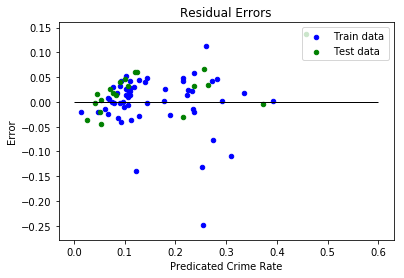

In [50]:
# Display residual errors for both the training and test sets
plt.scatter(ridge.predict(X_train), ridge.predict(X_train) - y_train, color = 'blue', s=20, label = 'Train data')
            
plt.scatter(ridge.predict(X_test), ridge.predict(X_test) - y_test, color = 'green', s=20, label = 'Test data')

plt.hlines( y = 0, xmin = 0, xmax = 0.6, linewidth =1)
plt.legend( loc = 'upper right')
plt.title('Residual Errors')
plt.xlabel("Predicated Crime Rate")
plt.ylabel("Error")
plt.show()

#### Observations:
- In comparison with LinearRegression, the Ridge regression seemingly performs better. For example, for the 5-fold cross validation, the scores for the former vary from 0.19063 to 0.82469 and the same for the latter vary from 0.40766 to 0.80000. The latter is more consistent. In addition, the mean score for the latter is also higher. We should use the results from the Ridge regression.

In [51]:
# Use the Lasso regression to figure out most important features
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01, normalize=True)

# with Crime Rate, all of estimated coefficients return 0. So here use the log version of the Crime Rate
lasso.fit(X, Y.Crime_Rate_Log)
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lasso.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,HS_RATE,-0.000000
1,BACH_RATE,-0.000000
2,UNEMP_RATE,4.683478
3,OWN_OCC_HU_RATE,-0.876674
4,MED_AGE_N,-0.000000
5,MEDINC_N,-0.000000


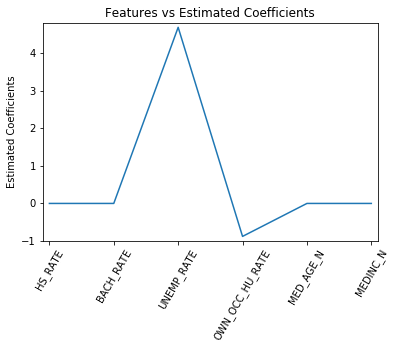

In [81]:
# Plot the features and their estimated coefficients with the Lasso regression
plt.plot(range(len(X.columns)), lasso.coef_)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.title('Features vs Estimated Coefficients')
#plt.xlabel("Features")
plt.ylabel("Estimated Coefficients")
plt.show()

In [53]:
X.columns.values

array(['HS_RATE', 'BACH_RATE', 'UNEMP_RATE', 'OWN_OCC_HU_RATE',
       'MED_AGE_N', 'MEDINC_N'], dtype=object)

#### Observations

-The Unemployment Rate is the dominant feature in determining the Crime Rate, and the House/Apartment Owning Rate is the second import feature impacting the crime rate. 


## Clustering

In [54]:
X.describe()

,HS_RATE,BACH_RATE,UNEMP_RATE,OWN_OCC_HU_RATE,MED_AGE_N,MEDINC_N
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.729561,0.263865,0.149045,0.415369,0.350922,0.235841
std,0.108566,0.190725,0.082832,0.185821,0.048218,0.105358
min,0.419851,0.034767,0.036669,0.073791,0.205975,0.074228
25%,0.647942,0.109592,0.087322,0.300247,0.313922,0.153503
50%,0.748816,0.200800,0.131582,0.367214,0.347002,0.217105
75%,0.815355,0.360272,0.214679,0.521871,0.379344,0.298687
max,0.904365,0.722836,0.407990,0.831542,0.467294,0.507793


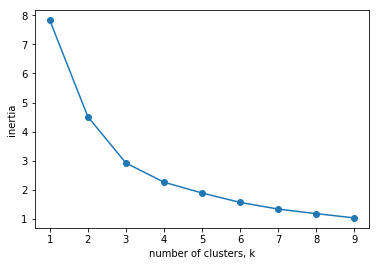

In [55]:
# In this plot, identify the optimized number of clusters
from sklearn.cluster import KMeans
ks = range(1,10)
inertias =[]

for k in ks:
    kms = KMeans(n_clusters = k)
    kms.fit(X)
    inertias.append(kms.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel( 'number of clusters, k')
plt.ylabel( 'inertia')
plt.xticks(ks)
plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# use standardization because each feature has different mean and variance
scaler = StandardScaler()
# after some tries, use 7 based on the above analysis
km = KMeans(n_clusters=7)

pipeline = make_pipeline(scaler, km)
pipeline.fit(X)

labels = pipeline.predict(X)

In [57]:
centroids = km.cluster_centers_
print (centroids)

[[-1.51046734 -0.81908388 -0.06335841  0.08881311 -0.86964037 -0.37349912]
 [ 0.32937053  0.50387293 -0.66254231 -0.2703412   0.1464509  -0.01572733]
 [ 1.00220126  1.95800795 -1.09622186 -0.2793047  -0.54324222  1.48207376]
 [ 1.43431298  0.89084334 -1.02098433  1.94716076  1.32489752  1.94514056]
 [ 0.57548168 -0.25030786 -0.24070892  1.29522504  1.13532865  0.39026469]
 [ 0.00730154 -0.4916208   0.90244367 -0.56557656  0.48770672 -0.83933388]
 [-0.61701711 -0.89689924  1.64709045 -1.27863868 -1.27459917 -1.2023494 ]]


In [58]:
# Combine the labels and the Crime Rate
results = pd.DataFrame({'Label': labels, 'Crime_Rate':Y.Crime_Rate})

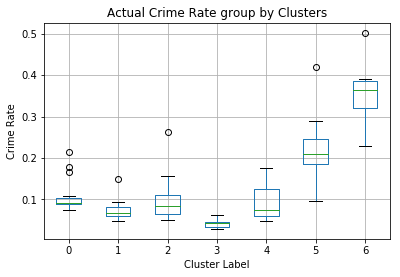

In [60]:
# Use box plot to view the Crime Rate distribution by newly produced labels

results.boxplot(column='Crime_Rate', by = 'Label')
#sns.boxplot(y='Crime_Rate', x ='Label', data=results)
plt.title("Actual Crime Rate group by Clusters")
plt.suptitle('') # Remove the automatic title
plt.xlabel("Cluster Label")
plt.ylabel("Crime Rate")
plt.show()

In [62]:
# Find out the relevant Community Areas by their names and IDs
cluster_df = pd.DataFrame({'Label': labels, 'Crime_Rate':Y.Crime_Rate, 
                         'Community_Area':merged_df['Community_Area'], 'GEOG':merged_df['GEOG']})
#print(cluster_df.sort_values(by = 'Labels'))
#cluster_df_sort = cluster_df.sort_values(by = 'Labels')
cluster_df[(cluster_df['Label'] == 5) | (cluster_df['Label'] == 6)].sort_values(by = 'Label')

,Label,Crime_Rate,Community_Area,GEOG
2,5,0.096023,34,Armour Square
61,5,0.255841,46,South Chicago
60,5,0.211537,49,Roseland
57,5,0.207847,50,Pullman
55,5,0.147580,36,Oakland
73,5,0.200366,53,West Pullman
29,5,0.289326,69,Greater Grand Crossing
62,5,0.174197,51,South Deering
28,5,0.189957,38,Grand Boulevard
17,5,0.152931,35,Douglas


#### Observations:
- Community Areas in the cluster labels #6 and #5 have highest average crime rate,  and these in labels #3 have the lowest.
- If a Community Area falls in the cluster of #6 with its demographic information above, it is very likely to have a high crime rate. Suggest that the Chicago government pay attention to the Community Areas in this group.

In [64]:
# Further Analysis on features for Community Areas labeled as #1

all_df = pd.concat([cluster_df, X], axis=1)
l1_df = all_df[(all_df['Label'] == 6) ]
l1_df.sort_values(by = 'Community_Area')

,Label,Crime_Rate,Community_Area,GEOG,HS_RATE,BACH_RATE,UNEMP_RATE,OWN_OCC_HU_RATE,MED_AGE_N,MEDINC_N
71,6,0.502303,26,West Garfield Park,0.632334,0.034767,0.178452,0.180865,0.293777,0.119737
19,6,0.383683,27,East Garfield Park,0.676211,0.109561,0.203072,0.187849,0.297945,0.107410
51,6,0.350840,29,North Lawndale,0.629832,0.093318,0.233949,0.183501,0.285875,0.111917
68,6,0.377099,40,Washington Park,0.706870,0.148092,0.317697,0.119657,0.266263,0.110424
76,6,0.228956,42,Woodlawn,0.714008,0.200125,0.227969,0.159656,0.308638,0.119928
58,6,0.321468,54,Riverdale,0.617550,0.041667,0.407990,0.073791,0.205975,0.074228
70,6,0.317384,67,West Englewood,0.679337,0.069378,0.347623,0.354163,0.346516,0.136997
23,6,0.390983,68,Englewood,0.647942,0.054439,0.359956,0.175070,0.313922,0.099269


In [87]:
l1_df[['Community_Area', 'GEOG', 'Crime_Rate']].sort_values(by = 'Community_Area')

,Community_Area,GEOG,Crime_Rate
71,26,West Garfield Park,0.502303
19,27,East Garfield Park,0.383683
51,29,North Lawndale,0.350840
68,40,Washington Park,0.377099
76,42,Woodlawn,0.228956
58,54,Riverdale,0.321468
70,67,West Englewood,0.317384
23,68,Englewood,0.390983


In [65]:
# Statistics for Community Areas labeled as #1
l1_df.describe()

,Label,Crime_Rate,Community_Area,HS_RATE,BACH_RATE,UNEMP_RATE,OWN_OCC_HU_RATE,MED_AGE_N,MEDINC_N
count,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,6.0,0.359090,44.125000,0.663010,0.093918,0.284589,0.179319,0.289864,0.109989
std,0.0,0.078024,17.166724,0.036451,0.057134,0.084226,0.080856,0.041112,0.018235
min,6.0,0.228956,26.000000,0.617550,0.034767,0.178452,0.073791,0.205975,0.074228
25%,6.0,0.320447,28.500000,0.631708,0.051246,0.221745,0.149656,0.280972,0.105374
50%,6.0,0.363969,41.000000,0.662076,0.081348,0.275823,0.177968,0.295861,0.111171
75%,6.0,0.385508,57.250000,0.686220,0.119194,0.350706,0.184588,0.309959,0.119785
max,6.0,0.502303,68.000000,0.714008,0.200125,0.407990,0.354163,0.346516,0.136997


In [66]:
# Statistics for Community Areas 
all_df.describe()

,Label,Crime_Rate,Community_Area,HS_RATE,BACH_RATE,UNEMP_RATE,OWN_OCC_HU_RATE,MED_AGE_N,MEDINC_N
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,2.844156,0.145176,39.000000,0.729561,0.263865,0.149045,0.415369,0.350922,0.235841
std,2.109284,0.105314,22.371857,0.108566,0.190725,0.082832,0.185821,0.048218,0.105358
min,0.000000,0.028793,1.000000,0.419851,0.034767,0.036669,0.073791,0.205975,0.074228
25%,1.000000,0.068223,20.000000,0.647942,0.109592,0.087322,0.300247,0.313922,0.153503
50%,3.000000,0.096950,39.000000,0.748816,0.200800,0.131582,0.367214,0.347002,0.217105
75%,5.000000,0.205405,58.000000,0.815355,0.360272,0.214679,0.521871,0.379344,0.298687
max,6.000000,0.502303,77.000000,0.904365,0.722836,0.407990,0.831542,0.467294,0.507793


In [71]:
# Compare average rate for all features and crime rate between all Community Areas and Label #1 Community Areas
mean_l1 = l1_df.mean()
mean_all = all_df.mean()
mean_df = pd.DataFrame({ 'Label #6 Communities':mean_l1, 'All Communities':mean_all})
mean_df = mean_df.drop(mean_df.index[[0,2]]) # drop rows for Lable and Community Area IDs

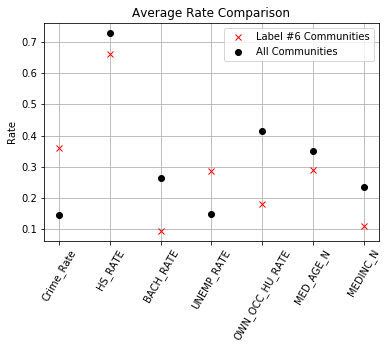

In [72]:
# Plot the average crime rate and average values for relevant features
plt.plot(range(len(mean_df.index)), mean_df['Label #6 Communities'], 'rx')
plt.plot(range(len(mean_df.index)), mean_df['All Communities'], 'ko')
plt.xticks(range(len(mean_df.index)), mean_df.index.values, rotation=60)
plt.legend( loc = 'upper right')
plt.title('Average Rate Comparison')
#plt.xlabel("Various Rates")
plt.ylabel("Rate")
plt.grid()
plt.show()

#### Observations:

- By comparing the features between the Community Areas labeled as #6 and all of Community Areas, we can conclude the following:
    --For the features of High School Diploma or Higher Rate, Bachelor Degree or Higher Rate, House/Apartment Owning Rate, Median Income, the Community Areas labeled as #6 have lower average values than for all of Community Areas;
    --For the features of Unemployment Rate, the Community Areas labeled as #6 have much higher average values than for all of Community Areas;
    --The Community Areas labeled as #6 have younger median age than that for all of Community Areas.